# Node2Vec

Paper: https://arxiv.org/abs/1607.00653

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from karateclub import Node2Vec

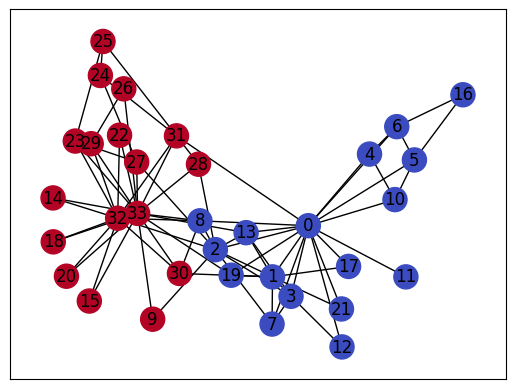

In [2]:
# Load the Karate Club Graph
G = nx.karate_club_graph()

# Draw the graph
labels = [1 if G.nodes[n]['club'] == 'Officer' else 0 for n in G.nodes]
layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=layout_pos, node_color=labels, cmap='coolwarm')

In [19]:
model = Node2Vec(walk_number=10, walk_length=80, p=0.1, q=0.9, dimensions=124)
model.fit(G)

In [20]:
embedding = model.get_embedding()
embedding.shape

(34, 124)

## Principal Component Analysis

In [21]:
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(embedding)

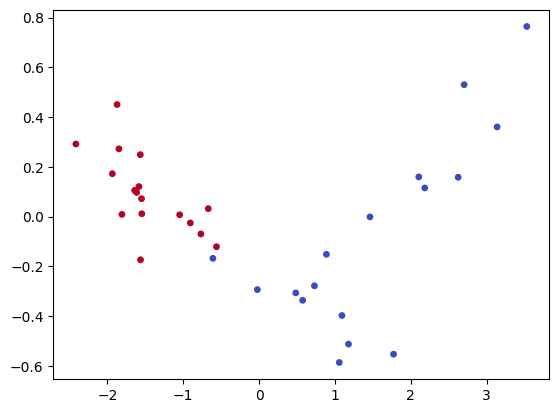

In [22]:
fix, ax = plt.subplots(1, 1)
ax.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=labels, s=15, cmap='coolwarm')

## T-SNE

In [23]:
tsne = TSNE(n_components=2)
tsne_embedding = tsne.fit_transform(embedding)

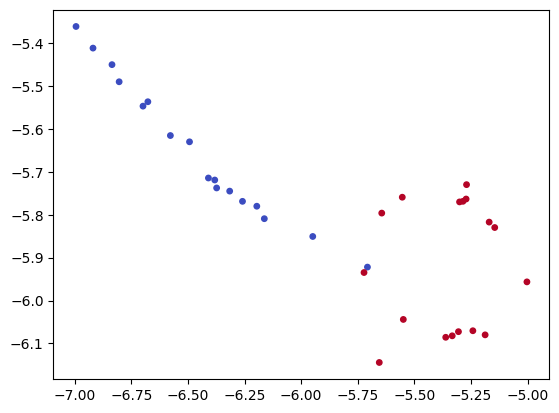

In [24]:
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=labels, s=15, cmap='coolwarm')

## Classification

### Classification for the PCA embedding

In [25]:
# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(pca_embedding, labels, test_size=0.3)

# Fot the model to our training data
model = LogisticRegression(random_state=0).fit(x_train, y_train)

# Make predictions
y_predicted = model.predict(x_test)

# Compute AUC
auc = roc_auc_score(y_test, y_predicted)

print("AUC", auc)

AUC 1.0


### Classification for the T-SNE embedding

In [26]:
# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(tsne_embedding, labels, test_size=0.3)

# Fot the model to our training data
model = LogisticRegression(random_state=0).fit(x_train, y_train)

# Make predictions
y_predicted = model.predict(x_test)

# Compute AUC
auc = roc_auc_score(y_test, y_predicted)

print("AUC", auc)

AUC 1.0
